In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline

stand_scaler = StandardScaler()

ada_boost = GridSearchCV(AdaBoostClassifier(random_state = 46), param_grid={"learning_rate": [0.1, 0.05, 0.01 ,0.5],"n_estimators": [50, 100, 200]})
random_forest = GridSearchCV(RandomForestClassifier(random_state = 46), param_grid={"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]})
decision_tree = GridSearchCV(DecisionTreeClassifier(random_state = 46), param_grid={"max_depth": [3, 5, 7]})

classifiers = [decision_tree, random_forest, ada_boost]

In [ ]:
clf_labels = ["Decision Tree", "Random Forest", "AdaBoost"]

for (clf, label) in zip(classifiers, clf_labels):
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(f"-> {label}:\nScore: {score}\nBest params: {clf.best_params_}\n")

Decision Tree:
Score: 0.9385964912280702
Best params: {'max_depth': 3}

Random Forest:
Score: 0.9649122807017544
Best params: {'max_depth': 7, 'n_estimators': 100}

AdaBoost:
Score: 0.9649122807017544
Best params: {'learning_rate': 0.1, 'n_estimators': 200}



In [ ]:
best_model = RandomForestClassifier(max_depth=7, n_estimators=100, random_state = 46)
best_model.fit(X_train, y_train)
y_predict = best_model.predict(X_test)

In [ ]:
print("Classification report to Best Model:")
print(classification_report(y_test, y_predict))

Classification report to Best Model:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
breast_cancer_data = load_breast_cancer()
all_feature_names = breast_cancer_data.feature_names
weights = best_model.feature_importances_

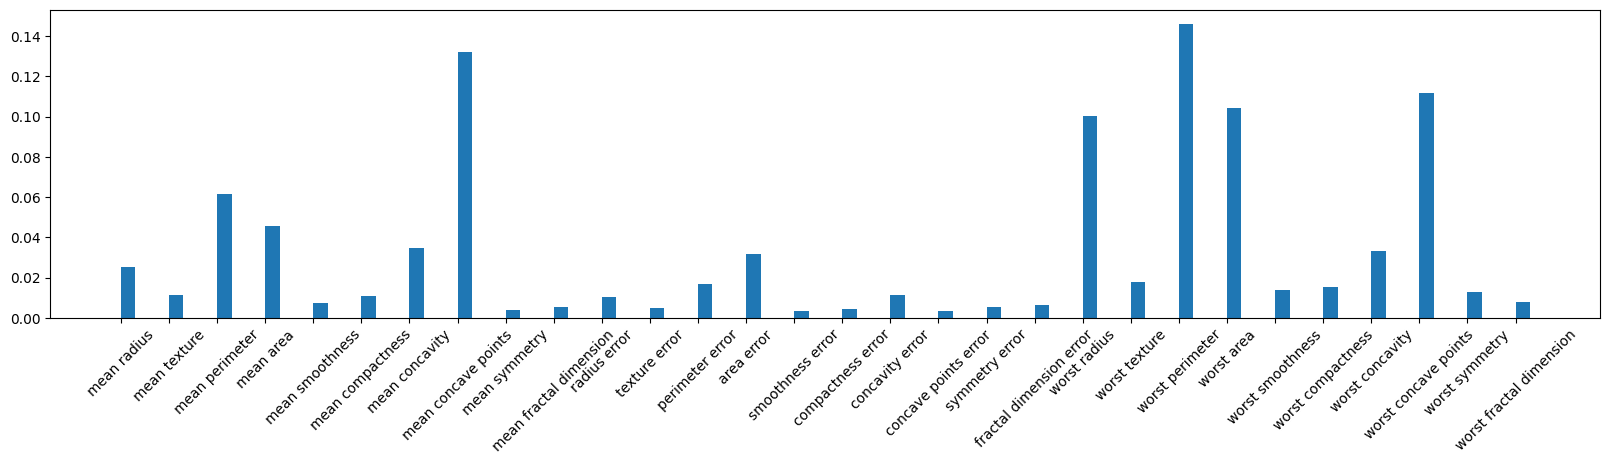

In [ ]:
plt.figure(figsize=(20, 4))
plt.bar(all_feature_names, weights, align='edge', width=0.3)
plt.plot()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
nonzero_weights = np.nonzero(weights > 0.03)
nonzero_weights

(array([ 2,  3,  6,  7, 13, 20, 22, 23, 26, 27]),)

In [ ]:
np.nonzero(weights > 0.03) # Select the best 10 features
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

breast_cancer_df = pd.DataFrame(np.c_[breast_cancer_data['data'], breast_cancer_data['target']],
                  columns= np.append(breast_cancer_data['feature_names'], ['target']))

breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
best_features = breast_cancer_df.columns[nonzero_weights[0]]
breast_cancer_df[best_features].head()

,mean perimeter,mean area,mean concavity,mean concave points,area error,worst radius,worst perimeter,worst area,worst concavity,worst concave points
0,122.80,1001.0,0.3001,0.14710,153.40,25.38,184.60,2019.0,0.7119,0.2654
1,132.90,1326.0,0.0869,0.07017,74.08,24.99,158.80,1956.0,0.2416,0.1860
2,130.00,1203.0,0.1974,0.12790,94.03,23.57,152.50,1709.0,0.4504,0.2430
3,77.58,386.1,0.2414,0.10520,27.23,14.91,98.87,567.7,0.6869,0.2575
4,135.10,1297.0,0.1980,0.10430,94.44,22.54,152.20,1575.0,0.4000,0.1625


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df[best_features], breast_cancer_df['target'], train_size=0.8, test_size=0.2, random_state=46)

for (clf, label) in zip(classifiers, clf_labels):
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(f"-> {label}:\nScore: {score}\nBest params: {clf.best_params_}\n")

-> Decision Tree:
Score: 0.9210526315789473
Best params: {'max_depth': 3}

-> Random Forest:
Score: 0.9385964912280702
Best params: {'max_depth': 7, 'n_estimators': 200}

-> AdaBoost:
Score: 0.9298245614035088
Best params: {'learning_rate': 0.1, 'n_estimators': 50}



In [ ]:
best_model = RandomForestClassifier(max_depth=7, n_estimators=200, random_state = 46)
best_model.fit(X_train, y_train)
y_predict = best_model.predict(X_test)

In [ ]:
print("Classification report to Best Model:")
print(classification_report(y_test, y_predict))

Classification report to Best Model:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        44
         1.0       0.96      0.94      0.95        70

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

